In [2]:
from init import *
from rootIO import *

In [12]:
_files_dir = '/Users/christianwittweg/geant4_workdir/MuensterTPC-MC/example_spectra_decay0/'
_filename = '*_Decay0_Xe124_'
_decayname = '2nukbplus'
_suffix = '.root'

_file = _files_dir + _filename + _decayname + _suffix

branches= ['eventid','ed', 'xp', 'yp', 'zp', 'type', 'trackid', 'time', 'parentid','etot']

df = g4root_to_df(_file,branches,1)


/Users/christianwittweg/geant4_workdir/MuensterTPC-MC/example_spectra_decay0/*_Decay0_Xe124_2nukbplus.root



In [13]:
df.head()

,eventid,ed,xp,yp,zp,type,trackid,time,parentid,etot
entry,,,,,,,,,,
0,0,"[5.4169, 26.383106, 0.0, 150.13332, 103.60142,...","[-438.8551, -438.8549, -438.8549, -439.1698, -...","[34.867226, 34.867844, 34.867844, 35.142376, 3...","[58.79835, 58.799255, 58.799255, 58.487923, 58...","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 5, 5, 8, 4, 4, ...","[2.1223704e-12, 2.134381e-12, 2.134381e-12, 6....","[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 5, 1, 1, ...",1629.711548
1,1,"[0.14798, 31.652016, 0.0, 276.06726, 124.08265...","[-345.53702, -345.5378, -345.5378, -345.37518,...","[54.548355, 54.54736, 54.54736, 54.848946, 55....","[-220.74518, -220.74442, -220.74442, -220.4978...","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 7, 7, ...","[1.4602027e-13, 1.6079592e-13, 1.6079592e-13, ...","[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 6, ...",1653.509766
2,2,"[5.4169, 26.38309, 0.0, 238.88066, 146.04602, ...","[332.80054, 332.8012, 332.8012, 332.96414, 333...","[-370.1233, -370.124, -370.124, -369.72766, -3...","[-89.16863, -89.16917, -89.16917, -89.258934, ...","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, ...","[7.333081e-13, 7.453188e-13, 7.453188e-13, 1.2...","[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...",2055.351807
3,3,"[5.4169, 26.383078, 0.0, 62.0584, 86.67277, 60...","[336.27747, 336.2785, 336.2785, 335.1887, 335....","[102.12111, 102.120926, 102.120926, 101.22068,...","[-296.0506, -296.05096, -296.05096, -295.88467...","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 5, 4, 4, 9, 10, 10, 8, 8...","[4.631572e-12, 4.643583e-12, 4.643583e-12, 1.8...","[0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 4, 9, 9, 4, 4, ...",752.156006
4,4,"[1.122, 30.678024, 0.0, 77.57234, 93.675446, 1...","[250.73523, 250.7358, 250.7358, 250.07353, 250...","[280.5098, 280.5088, 280.5088, 280.03046, 279....","[29.311062, 29.310219, 29.310219, 29.97169, 29...","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 1, 5, 5, 5, 4, 4, 4, 11,...","[3.2256999e-12, 3.2399643e-12, 3.2399643e-12, ...","[0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 4, ...",1421.408081


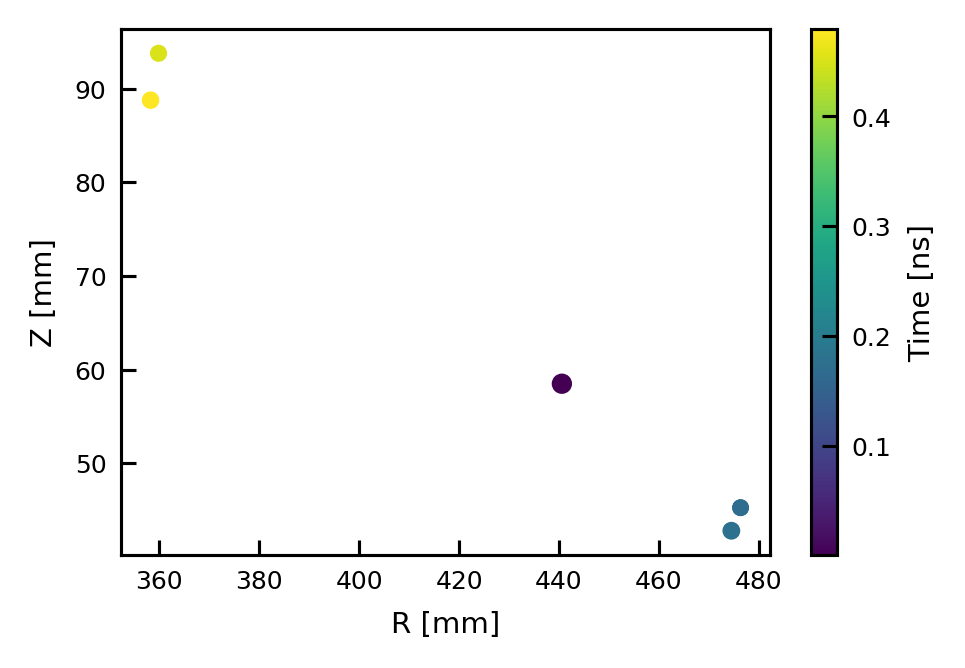

In [14]:
eventid=0

plt.scatter((np.sqrt(df.xp[eventid]**2+df.yp[eventid]**2)), df.zp[eventid], c=df.time[eventid]*1e9, s=df.ed[eventid]/10)
plt.colorbar(label='Time [ns]')
plt.xlabel('R [mm]')
plt.ylabel('Z [mm]')
plt.draw()
plt.show()

In [15]:
esum_late=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] > 0.02e-9:
        esum_late+=pair[1]
        
print(esum_late)

esum_early=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] < 0.02e-9:
        esum_early+=pair[1]
        
print(esum_early)

print(esum_early+esum_late)

1021.9978172034025
607.7138438224792
1629.7116610258818


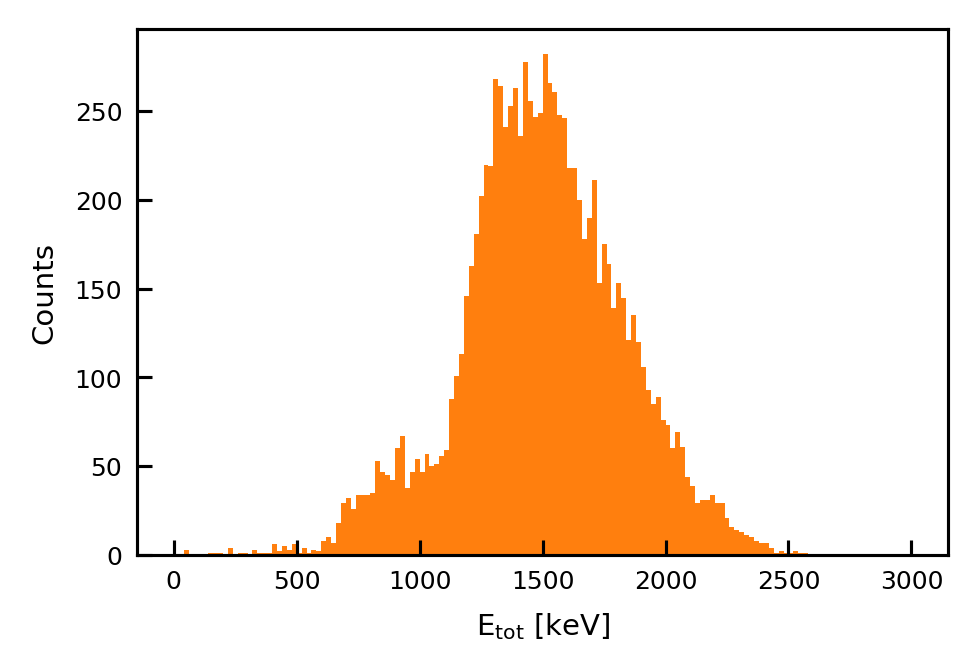

In [19]:
plt.hist(df.etot,range=(0,3000),bins=150)
plt.xlabel('E$_{\\rm{tot}}$ [keV]')
plt.ylabel('Counts')
plt.draw()
plt.savefig(_decayname+'_etot.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [17]:
for pair in zip(df.trackid[eventid], df.type[eventid], df.parentid[eventid]):
    print(pair)

(2, b'gamma', 0)
(3, b'e-', 2)
(3, b'e-', 2)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(5, b'gamma', 1)
(5, b'gamma', 1)
(8, b'gamma', 5)
(4, b'gamma', 1)
(4, b'gamma', 1)
(12, b'gamma', 4)
(13, b'e-', 12)
(13, b'e-', 12)
(11, b'e-', 4)
(11, b'e-', 4)
(11, b'e-', 4)
(11, b'e-', 4)
(11, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(9, b'e-', 8)
(9, b'e-', 8)
(7, b'e-', 5)
(7, b'e-', 5)
(7, b'e-', 5)
(6, b'e-', 5)
(6, b'e-', 5)
(6, b'e-', 5)
(6, b'e-', 5)
(6, b'e-', 5)
